In [1]:
# debuging
import pandas as pd
import openpyxl
import datetime
import warnings
warnings.filterwarnings("ignore")
maxObshtaPechalba = [0,1,0]
buffer = 0
while buffer <4:
    daysDiff = 1
    while daysDiff <4:
        obshtaPechalba = 0
        formatZero ='0'
        if(daysDiff+ 2<10): formatZero = '0'
        else: formatZero = ''
        date_str = "2023-01-"+formatZero+ str(daysDiff+1)
        date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
        firstBreakFlag = 0
        while firstBreakFlag <26:
            # Define variable to load the dataframe
            dataframe = openpyxl.load_workbook("Spot.xlsx")
            
            # Define variable to read sheet
            dataframe1 = dataframe.active

            # Iterate the loop to read the cell values


            forecastDate = date - datetime.timedelta(days=daysDiff)
            futuresDate = date - datetime.timedelta(days= daysDiff)
            for col in dataframe1.iter_cols(1, dataframe1.max_column):
                if(str(col[4].value)=="2022-01-01 00:00:00"):dateCol=col
                if(col[0].value=="Germany (DE-LU)"):
                    colNum=col
                    break
            num = 0
            for item in range(0,len(dateCol)):
                if(str(dateCol[item].value)==str(date)+" 00:00:00"):break
                num = num+1
            # print(dateCol[5].value,colNum[5].value)
            # print("Spot:",colNum[num].value)
            try:
                spot = colNum[num].value
            except:
                print("No such Spot date found")
                date = date + datetime.timedelta(days=1)
                firstBreakFlag = firstBreakFlag+1
                break
            # for row in range(0, dataframe1.max_row):
            #     print(colNum[row].value)

            bigNumberOfHours =0
            try:
                df = pd.read_csv('Forecasts\de\de_'+str(forecastDate)+'_10.csv')
            except:
                print("No such Forecast file found:",'de_'+str(forecastDate)+'_10.csv')
                date = date + datetime.timedelta(days=1)
                firstBreakFlag = firstBreakFlag+1
                continue
            numberOfHours=0
            suma = 0.0
            # print('de_'+str(forecastDate)+'_10.csv')
            # Access data in the DataFrame using column names or indexing
            for item in range(0,len(df)):
                string = df['index'][item].split()
                if(string[0]==str(date)):
                    numberOfHours = numberOfHours+1
                    # print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
                    suma = suma + df['pri de spot merged €/mwh cet h f '+str(forecastDate)+'T10:00:00+01:00'][item]
            # print("Forecast:",round(suma/numberOfHours,2))
            forecast =round(suma/numberOfHours,2)
            # print(numberOfHours)


            try:
                df3 = pd.read_csv('Futures\\'+str(futuresDate)+'_EEX German Power Futures_Base Day.csv')
            except:
                print("No such Futures file found:",'Futures\\'+str(futuresDate)+'_EEX German Power Futures_Base Day.csv')
                date = date + datetime.timedelta(days=1)
                firstBreakFlag = firstBreakFlag +1
                continue
            # print('Futures\\'+str(forecastDate)+'_EEX German Power Futures_Base Day.csv')
            for item in range(0,len(df3)):
                if(df3['gv.displaydate'][item]==str(date)):
                    # print("Futures:",df3['close'][item])
                    futures = df3['close'][item]
            # print("Forecast date:",forecastDate)
            if(forecast> futures+ buffer):
                # print("Buy signal!")
                # if(futures<spot):
                #     print("WIN!", spot - futures)
                # else:
                #     print("LOSE!",spot - futures)
                obshtaPechalba = obshtaPechalba + spot - futures
            elif(forecast+ buffer< futures):
                # print("Sell signal!")
                # if(futures>spot):
                #     print("WIN!", futures - spot)
                # else:
                #     print("LOSE!",futures - spot)
                obshtaPechalba = obshtaPechalba + futures - spot
            # else:
                # print("Hold signal!")
            date = date + datetime.timedelta(days=1)
            
            # for item in range(0,len(df)):
            #     if(df['index'][item]=="2024-01-02 01:00:00+01:00"):
            #         print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
                    
            # print(df.iloc[0])  # Access first row
        if(obshtaPechalba>maxObshtaPechalba[2]):
            maxObshtaPechalba[2]=obshtaPechalba
            maxObshtaPechalba[0]= daysDiff
            maxObshtaPechalba[1]= buffer
        print("Obshta Pechalba sus buffer:",buffer," i razlika v dnite:",daysDiff,"obshtaPechalba",obshtaPechalba)
        daysDiff= daysDiff+1
    buffer = buffer +1
print("Days from forecast:",maxObshtaPechalba[0],"Buffer:",maxObshtaPechalba[1],"Obshta Pechalba:",maxObshtaPechalba[2])

No such Futures file found: Futures\2024-01-01_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-06_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-07_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-13_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-14_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-20_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-21_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-27_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-01-28_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-02-03_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-02-04_EEX German Power Futures_Base Day.csv
No such Futures file found: Futures\2024-02-10_EEX German Power F

In [9]:
# debuging
import pandas as pd
import openpyxl
import datetime
import warnings
warnings.filterwarnings("ignore")
# Define variable to load the dataframe
dataframe = openpyxl.load_workbook("Spot.xlsx")
 
# Define variable to read sheet
dataframe1 = dataframe.active
 
# Iterate the loop to read the cell values
date_str = "2024-01-10"
date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
forecastDate = date - datetime.timedelta(days=1)
for col in dataframe1.iter_cols(1, dataframe1.max_column):
    if(str(col[4].value)=="2022-01-01 00:00:00"):dateCol=col
    if(col[0].value=="Germany (DE-LU)"):
        colNum=col
        break
num = 0
for item in range(0,len(dateCol)):
    if(str(dateCol[item].value)==str(date)+" 00:00:00"):break
    num = num+1
# print(dateCol[5].value,colNum[5].value)
print("Spot:",colNum[num].value)
# for row in range(0, dataframe1.max_row):
#     print(colNum[row].value)
bigSum = 0
bigNumberOfHours =0
formatZero = '0'
for hour in range(0,24):
    if(hour<10):formatZero='0'
    else: formatZero=''
    try:
        df = pd.read_csv('Forecasts\de\de_'+str(forecastDate)+'_'+formatZero+str(hour)+'.csv')
    except:
        print("No file found:",'de_'+str(forecastDate)+'_'+formatZero+str(hour)+'.csv')
        continue
    numberOfHours=0
    suma = 0.0
    # Access data in the DataFrame using column names or indexing
    for item in range(0,len(df)):
        string = df['index'][item].split()
        if(string[0]==str(date)):
            numberOfHours = numberOfHours+1
            # print(df['pri de spot merged €/mwh cet h f '+str(forecastDate)+'T'+formatZero+str(hour)+':00:00+01:00'][item])
            
            suma = suma + df['pri de spot merged €/mwh cet h f '+str(forecastDate)+'T'+formatZero+str(hour)+':00:00+01:00'][item]
    # print("Forecast:",round(suma/numberOfHours,2))
    if(numberOfHours==0):print(df['index'][item])
    print(numberOfHours)
    bigNumberOfHours= bigNumberOfHours+1
    bigSum = bigSum + suma/numberOfHours
    # print(numberOfHours)

print("Forecast:",round(bigSum/bigNumberOfHours,2))

df3 = pd.read_csv('Futures\\'+str(date)+'_EEX German Power Futures_Base Day.csv')
for item in range(0,len(df3)):
    if(df['gv.displaydate'][item]==str(date)):
        print("Futures:",df3['close'][item])
# for item in range(0,len(df)):
#     if(df['index'][item]=="2024-01-02 01:00:00+01:00"):
#         print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
        
# print(df.iloc[0])  # Access first row

Spot: 111.84
24
24
24
24
24
24
24
24
24
24
24
24
24
2024-04-09 23:00:00+02:00
0


ZeroDivisionError: float division by zero

 
futuresa e v nedelq, vzimane na petuk
Spot date: 2023-01-04
No such Forecast file found: de_2023-01-01_23.csv
Den ot sedmicata:  2
 
Spot date: 2023-01-05
No such Forecast file found: de_2023-01-02_23.csv
Den ot sedmicata:  3
 
Spot date: 2023-01-06
de_2023-01-03_23.csv
Futures\2023-01-03_EEX German Power Futures_Base Day.csv
date 2023-01-06
futures: 111.55
Forecast date: 2023-01-03
Sell signal!
LOSE! -5.920000000000002
 
Spot date: 2023-01-07
de_2023-01-04_23.csv
Futures\2023-01-04_EEX German Power Futures_Base Day.csv
date 2023-01-07
futures: 105.45
Forecast date: 2023-01-04
Sell signal!
WIN! 16.64
 
Spot date: 2023-01-08
de_2023-01-05_23.csv
Futures\2023-01-05_EEX German Power Futures_Base Day.csv
date 2023-01-08
futures: 56.38
Forecast date: 2023-01-05
Sell signal!
LOSE! -12.559999999999995
 
Spot date: 2023-01-09
de_2023-01-06_23.csv
Futures\2023-01-06_EEX German Power Futures_Base Day.csv
date 2023-01-09
futures: 113.75
Forecast date: 2023-01-06
Sell signal!
LOSE! -15.539999999

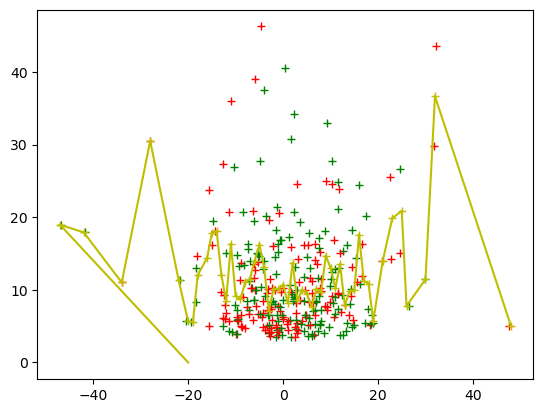

Corelation coeficient: 0.009153995476472684


In [13]:
# Germany
import pandas as pd
import openpyxl
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import math
# difference in days betweeen the day the purchase is being held and the date of the futures.
daysDiff= 3
corelationArrX = list()
corelationArrY = list()
# Buffer is a number that just a safe zone. The difference between the futures and forecast must be greater from the buffer for
# a trade to happen. If it's less we just hold.
buffer = 3.5
graphList = dict()
obshtaPechalba = 0
maxObshtaPechalba = [0,1,0]
# while buffer <8.0:
# daysDiff = 2
# while daysDiff <4:
# End results of trading while folowing certain forecast values:
obshtaPechalba = 0
winSum = 0
winN = 0
loseSum = 0
loseN = 0
# Formating in 2023-01-01
formatZero ='0'
if(daysDiff+ 2<10): formatZero = '0'
else: formatZero = ''
date_str = "2023-01-"+formatZero+ str(daysDiff+1)
date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()



firstBreakFlag = 0
while firstBreakFlag <30:
    # Define variable to load the dataframe
    dataframe = openpyxl.load_workbook("Spot.xlsx")
    print(" ")
    # Define variable to read sheet
    dataframe1 = dataframe.active

    # Iterate the loop to read the cell values
    # check if date is in weekend since the prices are frozen saturday and sunday and getting the data for prices from Friday
    weeknd = date.weekday()
    # if weeknd == 5:
    #     spotDate = date
    # elif weeknd == 6:
    forecastDate = date - datetime.timedelta(days=daysDiff)
    
    if(forecastDate.weekday()==5):
        print("futuresa e v subota, vzimane na petuk")
        futuresDate = date - datetime.timedelta(days= daysDiff+1)
    elif(forecastDate.weekday()==6):
        print("futuresa e v nedelq, vzimane na petuk")
        futuresDate = date - datetime.timedelta(days= daysDiff+2)
    else:
        futuresDate = date - datetime.timedelta(days= daysDiff)
    indexDate = forecastDate - datetime.timedelta(days=1)
    
    # Getting the coresponding Spot value
    
    for col in dataframe1.iter_cols(1, dataframe1.max_column):
        if(str(col[4].value)=="2022-01-01 00:00:00"):dateCol=col
        if(col[0].value=="Germany (DE-LU)"):
            colNum=col
            break
    num = 0
    for item in range(0,len(dateCol)):
        if(str(dateCol[item].value)==str(date)+" 00:00:00"):break
        num = num+1
    # print(dateCol[5].value,colNum[5].value)
    print("Spot date:", date)
    try:
        # print("Spot:",colNum[num].value)
        spot = colNum[num].value
    except:
        print("No such Spot date found")
        date = date + datetime.timedelta(days=1)
        firstBreakFlag = firstBreakFlag+1
        continue
    # for row in range(0, dataframe1.max_row):
    #     print(colNum[row].value)
    # Getting the forecast price:
    bigNumberOfHours =0
    
    if(forecastDate.year<2024):
        try:
            df = pd.read_csv('Forecasts2023\de_'+str(forecastDate)+'_23.csv')
        except:
            print("No such Forecast file found:",'de_'+str(forecastDate)+'_23.csv')
            date = date + datetime.timedelta(days=1)
            firstBreakFlag = firstBreakFlag+1
            print("Den ot sedmicata: ",weeknd)
            continue
        numberOfHours=0
        suma = 0.0
        print('de_'+str(forecastDate)+'_23.csv')
        # Access data in the DataFrame using column names or indexing
        for item in range(0,len(df)):
            string = df['index'][item].split()
            if(string[0]==str(date)):
                numberOfHours = numberOfHours+1
                # print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
                suma = suma + df['BaseDay d '+str(indexDate)][item]
        # print("Forecast:",round(suma/numberOfHours,2))
        forecast =round(suma/numberOfHours,2)
        if(numberOfHours==0):
            print("No data for "+str(date) +"in Forecast file: de_"+str(forecastDate)+'_10.csv')
            date = date + datetime.timedelta(days=1)
            firstBreakFlag = firstBreakFlag+1
            print("Den ot sedmicata: ",weeknd)
            continue
        
        # print('suma:',suma,'numberOfHours:',numberOfHours)
    else:
        try:
            df = pd.read_csv('Forecasts\de\de_'+str(forecastDate)+'_10.csv')
        except:
            print("No such Forecast file found:",'de_'+str(forecastDate)+'_10.csv')
            date = date + datetime.timedelta(days=1)
            firstBreakFlag = firstBreakFlag+1
            print("Den ot sedmicata: ",weeknd)
            continue
        numberOfHours=0
        suma = 0.0
        print('de_'+str(forecastDate)+'_10.csv')
        # Averaging all the Forecast values for the day to get the average price forecast for the said day:
        # Access data in the DataFrame using column names or indexing
        for item in range(0,len(df)):
            string = df['index'][item].split()
            if(string[0]==str(date)):
                numberOfHours = numberOfHours+1
                # print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
                suma = suma + df['pri de spot merged €/mwh cet h f '+str(forecastDate)+'T10:00:00+01:00'][item]
        # print("Forecast:",round(suma/numberOfHours,2))
        forecast =round(suma/numberOfHours,2)
        # print(numberOfHours)
        if(numberOfHours==0):
            print("No data for "+str(date) +"in Forecast file: de_"+str(forecastDate)+'_10.csv')
            date = date + datetime.timedelta(days=1)
            firstBreakFlag = firstBreakFlag+1
            print("Den ot sedmicata: ",weeknd)
            continue



# Getting the price that was actually being sold and bought at:
    try:
        df3 = pd.read_csv('Futures\\'+str(futuresDate)+'_EEX German Power Futures_Base Day.csv')
    except:
        print("No such Futures file found:",'Futures\\'+str(futuresDate)+'_EEX German Power Futures_Base Day.csv')
        date = date + datetime.timedelta(days=1)
        firstBreakFlag = firstBreakFlag +1
        continue
    print('Futures\\'+str(futuresDate)+'_EEX German Power Futures_Base Day.csv')
    print('date',date)
    for item in range(0,len(df3)):
        if(df3['gv.displaydate'][item]==str(date)):
            # print("Futures:",df3['close'][item])
            futures = df3['close'][item]
            continueFlag =0
            break
        else: continueFlag =1
    if(continueFlag ==1):
        print("No such date in Futures file found:",'Futures\\'+str(futuresDate)+'_EEX German Power Futures_Base Day.csv')
        date = date + datetime.timedelta(days=1)
        firstBreakFlag = firstBreakFlag +1
        continueFlag =0
        continue 
    print("futures:",futures)
    print("Forecast date:",forecastDate)
    # if the forecast for the price is bigger that the price being offered(the futures) the program gives a BUY signal and
    # if it is the oposite the program gives SELL signal. If the difference between the two is not big enough the program gives
    # HOLD signal. After that we check the Spot Value and we see if we actually gained money or not. 
    if(forecast> futures+ buffer):
        print("Buy signal!")
        if(futures<spot):
            print("WIN!", spot - futures)
            winN = winN +1
            winSum = winSum + spot - futures
        else:
            print("LOSE!",spot - futures)
            loseN = loseN +1
            loseSum = loseSum + spot - futures
        obshtaPechalba = obshtaPechalba + spot - futures
        corelationArrX.append(spot-futures)
        corelationArrY.append(forecast - futures)
        plt.plot(spot- futures,forecast - futures,"g+")
        if(int(round(spot- futures+20)) in graphList):
            graphList[int(round(spot- futures+20))].append(forecast -futures)
        else:
            listB = list()
            listB.append(forecast - futures)
            try:
                graphList[int(round(spot- futures+20))] = listB
            except:
                print("Outlier Found!")
    elif(forecast+ buffer< futures):
        print("Sell signal!")
        if(futures>spot):
            print("WIN!", futures - spot)
            winN = winN +1
            winSum = winSum + futures - spot
        else:
            print("LOSE!",futures - spot)
            loseN = loseN +1
            loseSum = loseSum + futures - spot
        obshtaPechalba = obshtaPechalba + futures - spot
        # if(futures> spot+40):
        #     print("futures:",futures,"spot", spot,"forecast:", forecast)
        #     print('date',date)
        #     break
        corelationArrX.append(futures-spot)
        corelationArrY.append(futures -forecast)
        plt.plot(futures-spot,futures - forecast,"r+")
        # print(int(round(futures - spot+20)))
        # graphList[int(round(futures - spot+20))].append(futures -forecast)
        # Searches for Signals that are extreamly bad or extreamly good. 
        if(int(round(futures - spot+20)) in graphList):
            graphList[int(round(futures - spot+20))].append(futures -forecast)
        else:
            listS = list()
            listS.append(futures - forecast)
            try:
                graphList[int(round(futures - spot+20))] = listS
            except:
                print("Outlier Found!")
    else:
        print("Hold signal!")
    
    date = date + datetime.timedelta(days=1)

    # for item in range(0,len(df)):
    #     if(df['index'][item]=="2024-01-02 01:00:00+01:00"):
    #         print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
            
    # print(df.iloc[0])  # Access first row
# print(obshtaPechalba)
try:
    print("Broi pechalbi:", winN,"Sredna pobeda:",winSum/winN)
    
except: print("Nqma pechalbi")
try: 
    print("Broi zagubi:", loseN,"Sredna zaguba:",loseSum/loseN)
except: print("Nqma Zagubi")
# Here the program searches the most successful buffer and difference in days between futures/forecast and spot.
if(obshtaPechalba>maxObshtaPechalba[2]):
    maxObshtaPechalba[2]=obshtaPechalba
    maxObshtaPechalba[0]= daysDiff
    maxObshtaPechalba[1]= buffer
print("Obshta Pechalba sus buffer:",buffer," i razlika v dnite:",daysDiff,"obshtaPechalba",obshtaPechalba)
    # daysDiff= daysDiff+1
    # buffer = buffer +0.5
# Here we start ploting the end results.
lastAvrg =[-20,0]
myKeys = list(graphList.keys())
myKeys.sort()
sorted_dict = {i: graphList[i] for i in myKeys}

for i in sorted_dict:
    listA = list()
    listA = sorted_dict[i]
    # print(listA)
    # print(len(listA))
    suma2 = 0
    for j in listA:
        suma2 = suma2+ j
    
    plt.plot(int(i)-20,suma2/len(listA),"y+")
    plt.plot([lastAvrg[0],int(i)-20],[lastAvrg[1],suma2/len(listA)],"y")
    lastAvrg = [int(i)-20,suma2/len(listA)]
print("Days from forecast:",maxObshtaPechalba[0],"Buffer:",maxObshtaPechalba[1],"Obshta Pechalba:",maxObshtaPechalba[2])
plt.show()
xy = 0
# Here we calculate the Corelation coeficient between difference of price between the forecast and the futures and the actual monetary gain.
# 1 means 1:1 corelation, 0 means no corelation and -1 means reverse corelation.
for i in range(0,len(corelationArrX)):
    xy = xy+ corelationArrX[i]*corelationArrY[i]
xSecondPWR = 0
for i in range(0,len(corelationArrX)):
    xSecondPWR = xSecondPWR + corelationArrX[i]*corelationArrX[i]
ySecondPWR = 0
for i in range(0,len(corelationArrY)):
    ySecondPWR = ySecondPWR + corelationArrY[i]*corelationArrY[i]
corelationCoef = (len(corelationArrX)*xy - sum(corelationArrX)*sum(corelationArrY))/ math.sqrt((len(corelationArrX)*xSecondPWR-math.pow(sum(corelationArrX),2))*(len(corelationArrY)*ySecondPWR-math.pow(sum(corelationArrY),2)))
print("Corelation coeficient:",corelationCoef)
    # if(obshtaPechalba>maxObshtaPechalba[2]):
    #     maxObshtaPechalba[2]=obshtaPechalba
    #     maxObshtaPechalba[0]= daysDiff
    #     maxObshtaPechalba[1]= buffer
    # print("Obshta Pechalba sus buffer:",buffer," i razlika v dnite:",daysDiff,"obshtaPechalba",obshtaPechalba)

 
futuresa e v nedelq, vzimane na petuk
Spot date: 2023-01-03
No such Forecast file found: fr_2023-01-01_23.csv
Den ot sedmicata:  1
 
Spot date: 2023-01-04
fr_2023-01-02_23.csv
Futures\2023-01-02_EEX French Power Futures_Base Day.csv
date 2023-01-04
futures: 85.0
Forecast date: 2023-01-02
Sell signal!
LOSE! -12.739999999999995
 
Spot date: 2023-01-05
fr_2023-01-03_23.csv
Futures\2023-01-03_EEX French Power Futures_Base Day.csv
date 2023-01-05
futures: 125.15
Forecast date: 2023-01-03
Sell signal!
LOSE! -1.5300000000000011
 
Spot date: 2023-01-06
fr_2023-01-04_23.csv
Futures\2023-01-04_EEX French Power Futures_Base Day.csv
date 2023-01-06
futures: 115.0
Forecast date: 2023-01-04
Sell signal!
LOSE! -6.480000000000004
 
Spot date: 2023-01-07
fr_2023-01-05_23.csv
Futures\2023-01-05_EEX French Power Futures_Base Day.csv
date 2023-01-07
futures: 102.97
Forecast date: 2023-01-05
Sell signal!
WIN! 17.510000000000005
 
Spot date: 2023-01-08
fr_2023-01-06_23.csv
Futures\2023-01-06_EEX French Po

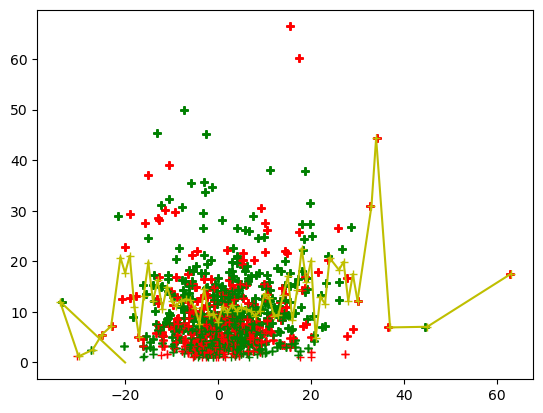

Corelation coeficient: 0.08037644654650565


In [16]:
import pandas as pd
import openpyxl
import datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import math
# franciq / France / It's the same program but it's uses the french energy market. 
daysDiff= 2
corelationArrX = list()
corelationArrY = list()
buffer = 1.0
graphList = dict()
obshtaPechalba = 0
maxObshtaPechalba = [0,1,0]
while buffer <8.0:
    daysDiff = 2
    while daysDiff <4:
        obshtaPechalba = 0
        winSum = 0
        winN = 0
        loseSum = 0
        loseN = 0
        formatZero ='0'
        if(daysDiff+ 2<10): formatZero = '0'
        else: formatZero = ''
        date_str = "2023-01-"+formatZero+ str(daysDiff+1)
        date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()



        firstBreakFlag = 0
        while firstBreakFlag <30:
            # Define variable to load the dataframe
            dataframe = openpyxl.load_workbook("Spot.xlsx")
            print(" ")
            # Define variable to read sheet
            dataframe1 = dataframe.active

            # Iterate the loop to read the cell values
            weeknd = date.weekday()
            # if weeknd == 5:
            #     spotDate = date
            # elif weeknd == 6:
            forecastDate = date - datetime.timedelta(days=daysDiff)
            
            if(forecastDate.weekday()==5):
                print("futuresa e v subota, vzimane na petuk")
                futuresDate = date - datetime.timedelta(days= daysDiff+1)
            elif(forecastDate.weekday()==6):
                print("futuresa e v nedelq, vzimane na petuk")
                futuresDate = date - datetime.timedelta(days= daysDiff+2)
            else:
                futuresDate = date - datetime.timedelta(days= daysDiff)
            indexDate = forecastDate - datetime.timedelta(days=1)
            
            
            
            for col in dataframe1.iter_cols(1, dataframe1.max_column):
                if(str(col[4].value)=="2022-01-01 00:00:00"):dateCol=col
                if(col[0].value=="France (FR)"):
                    colNum=col
                    break
            num = 0
            for item in range(0,len(dateCol)):
                if(str(dateCol[item].value)==str(date)+" 00:00:00"):break
                num = num+1
            # print(dateCol[5].value,colNum[5].value)
            print("Spot date:", date)
            try:
                # print("Spot:",colNum[num].value)
                spot = colNum[num].value
            except:
                print("No such Spot date found")
                date = date + datetime.timedelta(days=1)
                firstBreakFlag = firstBreakFlag+1
                continue
            # for row in range(0, dataframe1.max_row):
            #     print(colNum[row].value)

            bigNumberOfHours =0
            
            if(forecastDate.year<2024):
                try:
                    df = pd.read_csv('Forecasts2023\\fr_'+str(forecastDate)+'_23.csv')
                except:
                    print("No such Forecast file found:",'fr_'+str(forecastDate)+'_23.csv')
                    date = date + datetime.timedelta(days=1)
                    firstBreakFlag = firstBreakFlag+1
                    print("Den ot sedmicata: ",weeknd)
                    continue
                numberOfHours=0
                suma = 0.0
                print('fr_'+str(forecastDate)+'_23.csv')
                # Access data in the DataFrame using column names or indexing
                for item in range(0,len(df)):
                    string = df['index'][item].split()
                    if(string[0]==str(date)):
                        numberOfHours = numberOfHours+1
                        # print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
                        suma = suma + df['BaseDay d '+str(indexDate)][item]
                # print("Forecast:",round(suma/numberOfHours,2))
                forecast =round(suma/numberOfHours,2)
                if(numberOfHours==0):
                    print("No data for "+str(date) +"in Forecast file: fr_"+str(forecastDate)+'_10.csv')
                    date = date + datetime.timedelta(days=1)
                    firstBreakFlag = firstBreakFlag+1
                    print("Den ot sedmicata: ",weeknd)
                    continue
                
                # print('suma:',suma,'numberOfHours:',numberOfHours)
            else:
                try:
                    df = pd.read_csv('Forecasts\\fr\\fr_'+str(forecastDate)+'_10.csv')
                except:
                    print("No such Forecast file found:",'fr_'+str(forecastDate)+'_10.csv')
                    date = date + datetime.timedelta(days=1)
                    firstBreakFlag = firstBreakFlag+1
                    print("Den ot sedmicata: ",weeknd)
                    continue
                numberOfHours=0
                suma = 0.0
                print('fr_'+str(forecastDate)+'_10.csv')
                # Access data in the DataFrame using column names or indexing
                for item in range(0,len(df)):
                    string = df['index'][item].split()
                    if(string[0]==str(date)):
                        numberOfHours = numberOfHours+1
                        # print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
                        suma = suma + df['pri fr spot merged €/mwh cet h f '+str(forecastDate)+'T10:00:00+01:00'][item]
                # print("Forecast:",round(suma/numberOfHours,2))
                forecast =round(suma/numberOfHours,2)
                # print(numberOfHours)
                if(numberOfHours==0):
                    print("No data for "+str(date) +"in Forecast file: fr_"+str(forecastDate)+'_10.csv')
                    date = date + datetime.timedelta(days=1)
                    firstBreakFlag = firstBreakFlag+1
                    print("Den ot sedmicata: ",weeknd)
                    continue




            try:
                df3 = pd.read_csv('Futures\\'+str(futuresDate)+'_EEX French Power Futures_Base Day.csv')
            except:
                print("No such Futures file found:",'Futures\\'+str(futuresDate)+'_EEX French Power Futures_Base Day.csv')
                date = date + datetime.timedelta(days=1)
                firstBreakFlag = firstBreakFlag +1
                continue
            print('Futures\\'+str(futuresDate)+'_EEX French Power Futures_Base Day.csv')
            print('date',date)
            for item in range(0,len(df3)):
                if(df3['gv.displaydate'][item]==str(date)):
                    # print("Futures:",df3['close'][item])
                    futures = df3['close'][item]
                    continueFlag =0
                    break
                else: continueFlag =1
            if(continueFlag ==1):
                print("No such date in Futures file found:",'Futures\\'+str(futuresDate)+'_EEX French Power Futures_Base Day.csv')
                date = date + datetime.timedelta(days=1)
                firstBreakFlag = firstBreakFlag +1
                continueFlag =0
                continue 
            print("futures:",futures)
            print("Forecast date:",forecastDate)
            if(forecast> futures+ buffer):
                print("Buy signal!")
                if(futures<spot):
                    print("WIN!", spot - futures)
                    winN = winN +1
                    winSum = winSum + spot - futures
                else:
                    print("LOSE!",spot - futures)
                    loseN = loseN +1
                    loseSum = loseSum + spot - futures
                obshtaPechalba = obshtaPechalba + spot - futures
                corelationArrX.append(spot-futures)
                corelationArrY.append(forecast - futures)
                plt.plot(spot- futures,forecast - futures,"g+")
                if(int(round(spot- futures+20)) in graphList):
                    graphList[int(round(spot- futures+20))].append(forecast -futures)
                else:
                    listB = list()
                    listB.append(forecast - futures)
                    try:
                        graphList[int(round(spot- futures+20))] = listB
                    except:
                        print("Outlier Found!")
            elif(forecast+ buffer< futures):
                print("Sell signal!")
                if(futures>spot):
                    print("WIN!", futures - spot)
                    winN = winN +1
                    winSum = winSum + futures - spot
                else:
                    print("LOSE!",futures - spot)
                    loseN = loseN +1
                    loseSum = loseSum + futures - spot
                obshtaPechalba = obshtaPechalba + futures - spot
                # if(futures> spot+40):
                #     print("futures:",futures,"spot", spot,"forecast:", forecast)
                #     print('date',date)
                #     break
                corelationArrX.append(futures-spot)
                corelationArrY.append(futures -forecast)
                plt.plot(futures-spot,futures - forecast,"r+")
                # print(int(round(futures - spot+20)))
                # graphList[int(round(futures - spot+20))].append(futures -forecast)
                if(int(round(futures - spot+20)) in graphList):
                    graphList[int(round(futures - spot+20))].append(futures -forecast)
                else:
                    listS = list()
                    listS.append(futures - forecast)
                    try:
                        graphList[int(round(futures - spot+20))] = listS
                    except:
                        print("Outlier Found!")
            else:
                print("Hold signal!")
            
            date = date + datetime.timedelta(days=1)

            # for item in range(0,len(df)):
            #     if(df['index'][item]=="2024-01-02 01:00:00+01:00"):
            #         print(df['pri de spot merged €/mwh cet h f 2024-01-01T01:00:00+01:00'][item])
                    
            # print(df.iloc[0])  # Access first row
        # print(obshtaPechalba)
        try:
            print("Broi pechalbi:", winN,"Sredna pobeda:",winSum/winN)
            
        except: print("Nqma pechalbi")
        try: 
            print("Broi zagubi:", loseN,"Sredna zaguba:",loseSum/loseN)
        except: print("Nqma Zagubi")

        if(obshtaPechalba>maxObshtaPechalba[2]):
            maxObshtaPechalba[2]=obshtaPechalba
            maxObshtaPechalba[0]= daysDiff
            maxObshtaPechalba[1]= buffer
        print("Obshta Pechalba sus buffer:",buffer," i razlika v dnite:",daysDiff,"obshtaPechalba",obshtaPechalba)
        daysDiff= daysDiff+1
    buffer = buffer +0.5
lastAvrg =[-20,0]
myKeys = list(graphList.keys())
myKeys.sort()
sorted_dict = {i: graphList[i] for i in myKeys}

for i in sorted_dict:
    listA = list()
    listA = sorted_dict[i]
    # print(listA)
    # print(len(listA))
    suma2 = 0
    for j in listA:
        suma2 = suma2+ j
    
    plt.plot(int(i)-20,suma2/len(listA),"y+")
    plt.plot([lastAvrg[0],int(i)-20],[lastAvrg[1],suma2/len(listA)],"y")
    lastAvrg = [int(i)-20,suma2/len(listA)]
print("Days from forecast:",maxObshtaPechalba[0],"Buffer:",maxObshtaPechalba[1],"Obshta Pechalba:",maxObshtaPechalba[2])
plt.show()
xy = 0
for i in range(0,len(corelationArrX)):
    xy = xy+ corelationArrX[i]*corelationArrY[i]
xSecondPWR = 0
for i in range(0,len(corelationArrX)):
    xSecondPWR = xSecondPWR + corelationArrX[i]*corelationArrX[i]
ySecondPWR = 0
for i in range(0,len(corelationArrY)):
    ySecondPWR = ySecondPWR + corelationArrY[i]*corelationArrY[i]
corelationCoef = (len(corelationArrX)*xy - sum(corelationArrX)*sum(corelationArrY))/ math.sqrt((len(corelationArrX)*xSecondPWR-math.pow(sum(corelationArrX),2))*(len(corelationArrY)*ySecondPWR-math.pow(sum(corelationArrY),2)))
print("Corelation coeficient:",corelationCoef)
    # if(obshtaPechalba>maxObshtaPechalba[2]):
    #     maxObshtaPechalba[2]=obshtaPechalba
    #     maxObshtaPechalba[0]= daysDiff
    #     maxObshtaPechalba[1]= buffer
    # print("Obshta Pechalba sus buffer:",buffer," i razlika v dnite:",daysDiff,"obshtaPechalba",obshtaPechalba)

In [24]:
# debug
years_dict = dict()

xy = [40,2]
if xy[0] in years_dict:
    # append the new number to the existing array at this slot
    years_dict[xy[0]].append(xy[1])
else:
    # create a new array in this slot
    years_dict[xy[0]] = [xy[1]]
print(years_dict)

{40: [2]}
